# Cyber Data Analytics, CS4035
## Lab assignment 1: Fraud detection - Bonus Task
### April 2019

**Group 20**:
- Konstantinos Chronas, 4923162
- Ioannis Lelekas, 4742559

In [1]:

# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [2]:
#load data to pandas
#drop nan
#exclude Refused Transactions
df = pd.read_csv('data_for_student_case.csv')
df = df.dropna()
df = df.loc[df['simple_journal']!='Refused']

data_cat = df.copy(True)


### Data Preprocessing 

In [3]:
#Format Date
df['creationdate'] = pd.to_datetime(df['creationdate'],format='%Y-%m-%d %H:%M:%S')
df['bookingdate'] = pd.to_datetime(df['bookingdate'],format='%Y-%m-%d %H:%M:%S')
df['creation_month'] = df.creationdate.dt.month
df['creation_year'] = df.creationdate.dt.year
df['creation_day'] = df.creationdate.dt.day
df['creation_hour'] = df.creationdate.dt.hour

# add a new binary column for Fraud and Valid
#df['Class'] = np.where(df['simple_journal']=='Chargeback', 1, 0)
label_mapping = {}

# Convert currency code in order to 'amount' in a single code
label_mapping['numcurrencycode'] = {'SEK': 0.09703, 'MXN': 0.04358, 'AUD': 0.63161, 'NZD': 0.58377, 'GBP':1.13355} 
df['numcurrencycode'] = df['currencycode']
df.replace({'numcurrencycode' : label_mapping['numcurrencycode']}, inplace=True)
df['amount'] = df['amount'] * df['numcurrencycode']

label_mapping['simple_journal'] = {'Settled': 0, 'Chargeback' : 1}
df.replace({'simple_journal' : label_mapping['simple_journal']}, inplace=True)



### Visualizations
- Below we show a few visualizations of our data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130EC2C6E48>,
      dtype=object)

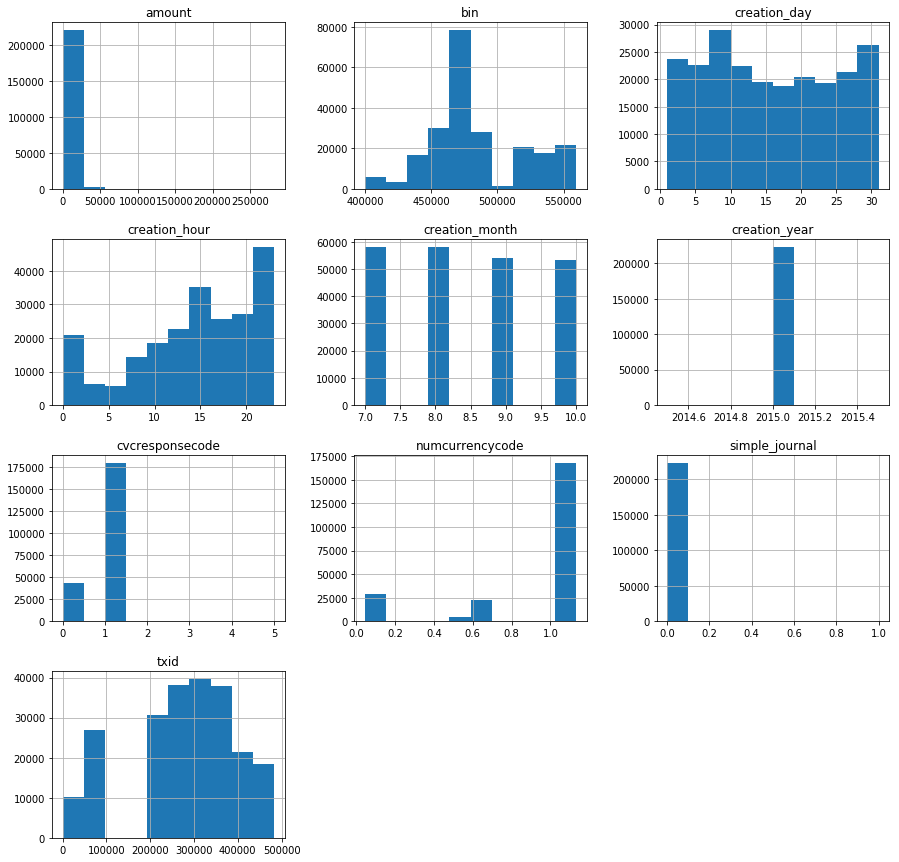

In [4]:
#PLOT a histogram distribution of the data values 
df.hist(figsize= (15,15))

In [5]:

#create new dataframes for fraud and valid
Fraud =  df[df['simple_journal'] == 1]
Valid = df[df['simple_journal']==0]

print('Fraud Cases:{}'.format(len(Fraud))) #number of frauds cases
print('Valid Cases:{}'.format(len(Valid))) #number of valid cases
   

Fraud Cases:345
Valid Cases:223165


### Correlation Matrix
The correlation matrix shows the  correlation coefficients between variables in order to summarise our data. Each cell in the table shows the correlation between two variables.

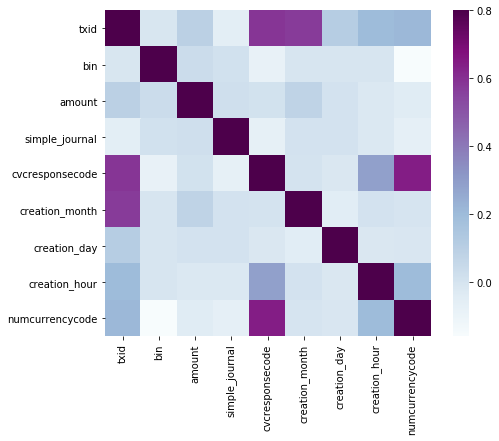

In [6]:
#  plot Correlation Matrix 
df1=df.drop(['creation_year'], axis=1)
cor_mat = df1.corr(method ='spearman')
fig = plt.figure(figsize = (8,6))
sns.heatmap(cor_mat, vmax= .8, square = True, cmap='BuPu')
plt.show()

### Barplot 
This plot shows the number of Fraud transaction for each month in the data. We inspected that from all the date features month has diversity between the fraud and non fraud transactions 

Text(0, 0.5, 'Number of Fraud Transactions')

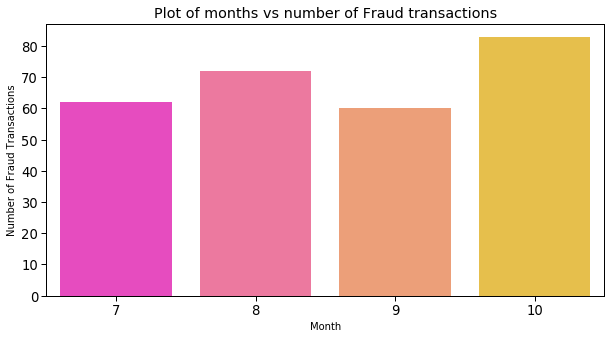

In [13]:
#plot countplot of Fraud transactions vs the months 
data_1 = df[['creation_day','creation_month','card_id','accountcode','currencycode','simple_journal']].copy()


#plot countplot of Fraud transactions vs the months 
data_Fraud=data_1[data_1['simple_journal']==1]
data_Valid=data_1[data_1['simple_journal']==0]
plt.figure(figsize=(10,5))
sns.set_context('paper', font_scale=1.5, rc={'font.size':1,'axes.labelsize':10})
pl=sns.countplot(x='creation_month', data=data_Fraud,palette='spring')
pl.set_title('Plot of months vs number of Fraud transactions')
pl.set_xlabel('Month')
pl.set_ylabel('Number of Fraud Transactions')

### Create and Add new features 
- added feature number of cardid over month 
- added feature number of currencies used over month
- added feautre number of accountcode over month 

In [11]:
#cardid over month 
df_1 = df[['card_id','creation_month']]
card_month = df.groupby(['card_id','creation_month'], as_index=False)
df_1['card_month'] = 1
card_sum = card_month.sum()
df=pd.merge(df,card_sum,how='inner')

#currency type over month
currency = df[['currencycode','creation_month']]
currency['currency_month'] = 1
currency_month = currency.groupby(['currencycode','creation_month'], as_index=False)
curr_sum = currency_month.sum()
df=pd.merge(df,curr_sum,how='inner')


#accountcode type over month
acc_code = df[['accountcode','creation_month']]
acc_code['acc_code_month'] = 1
acc_code_month = acc_code.groupby(['accountcode','creation_month'], as_index=False)
acc_code_sum = acc_code_month.sum()
df=pd.merge(df,acc_code_sum,how='inner')

#convert data to numeric
label_mapping = {}
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])

#print the modified df    
print(list(df.columns.values))
df.describe()

C:\Users\Kon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Kon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Kon\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

['txid', 'bookingdate', 'issuercountrycode', 'txvariantcode', 'bin', 'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction', 'simple_journal', 'cardverificationcodesupplied', 'cvcresponsecode', 'creationdate', 'accountcode', 'mail_id', 'ip_id', 'card_id', 'creation_month', 'creation_year', 'creation_day', 'creation_hour', 'numcurrencycode', 'currency_month', 'acc_code_month']


,txid,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,...,mail_id,ip_id,card_id,creation_month,creation_year,creation_day,creation_hour,numcurrencycode,currency_month,acc_code_month
count,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000,...,201450.000000,201450.000000,201450.000000,201450.000000,201450.0,201450.000000,201450.000000,201450.000000,201450.000000,201450.000000
mean,282431.497617,17.178560,3.530231,484876.123936,7511.674065,2.737677,16.551705,0.020343,0.001375,0.018789,...,93326.079732,89613.991839,95225.079608,8.470484,2015.0,15.267506,14.426761,0.936999,29479.825465,29683.108146
std,119613.870660,4.874154,2.140961,35902.025559,5998.513422,0.905775,6.719568,0.152039,0.037056,0.135779,...,54598.432335,53106.567762,55479.497753,1.117691,0.0,9.027134,6.592159,0.367961,14726.284433,14376.505692
min,1.000000,0.000000,0.000000,400022.000000,31.580500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,2015.0,1.000000,0.000000,0.043580,853.000000,1978.000000
25%,227202.500000,18.000000,1.000000,462239.000000,4080.780000,3.000000,17.000000,0.000000,0.000000,0.000000,...,46433.250000,43060.000000,47470.250000,7.000000,2015.0,8.000000,11.000000,1.133550,35854.000000,35854.000000
50%,298740.000000,18.000000,5.000000,475130.000000,6568.922250,3.000000,17.000000,0.000000,0.000000,0.000000,...,92241.500000,87877.500000,94459.500000,8.000000,2015.0,15.000000,16.000000,1.133550,37228.000000,37228.000000
75%,366988.750000,18.000000,5.000000,518126.000000,8972.048250,3.000000,17.000000,0.000000,0.000000,0.000000,...,140177.750000,135403.750000,142877.750000,9.000000,2015.0,23.000000,20.000000,1.133550,38809.000000,38809.000000
max,482733.000000,112.000000,11.000000,559567.000000,282027.240000,4.000000,140.000000,2.000000,1.000000,1.000000,...,189546.000000,183837.000000,192518.000000,10.000000,2015.0,31.000000,23.000000,1.133550,39522.000000,39522.000000


C:\Users\Kon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Kon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Kon\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


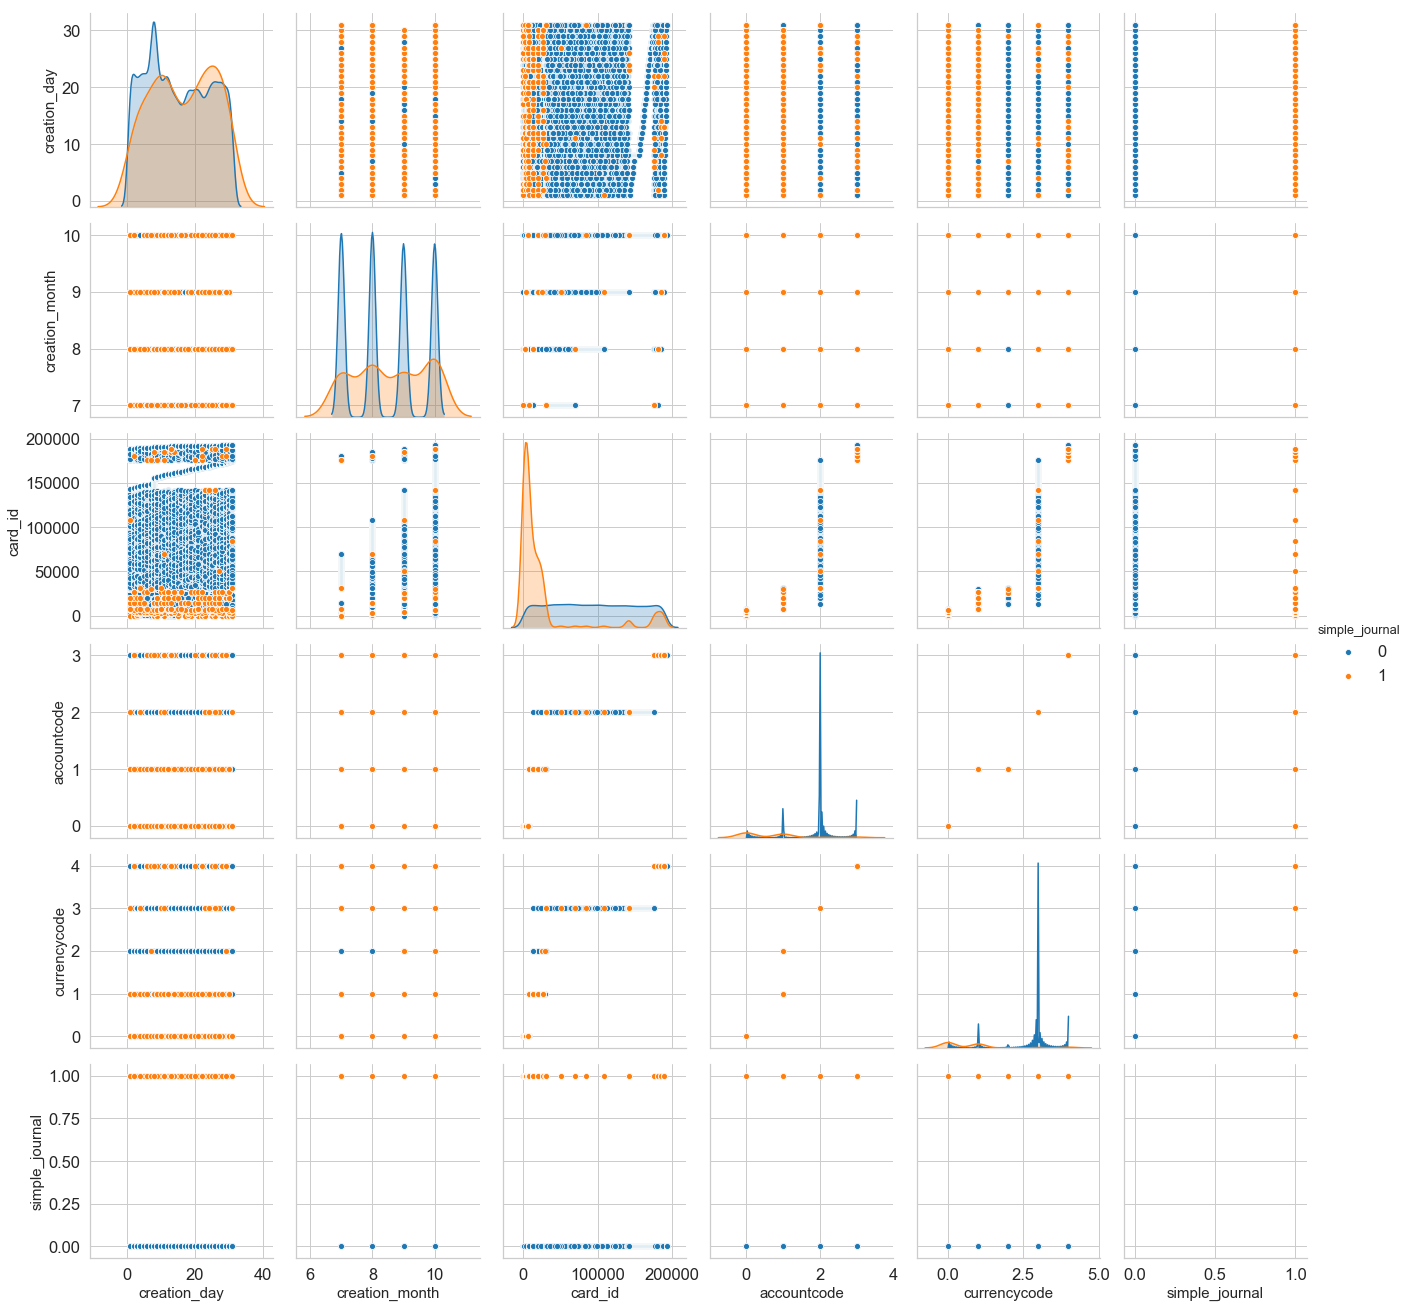

In [16]:
#plot relationships between the selected variables using sns.pairplot 


sns.set_context('notebook', font_scale=1.5, rc={'font.size':1,'axes.labelsize':15})
sns.set_style('whitegrid');
sns.pairplot(data_1, hue='simple_journal',size=3);

In [11]:

from PlotConfusionMatrix import *
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from HelperFunctions import *
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# drop columns for the train set
X = df.drop(['simple_journal', 'creationdate', 'bookingdate', 'currencycode', 'numcurrencycode','creation_year', 'creation_day', 'creation_hour','creation_month'], axis = 1).values
y = df['simple_journal'].values


num_splits = 10
cv = StratifiedKFold(n_splits = num_splits, shuffle = True)

## Voting Classifier on unsmoted data
### Classifiers used for combnaition: 
- Logistic Regression
- Linear Discriminant Analaysis
- Naive Bayes 

We scaled the train data with the StandardScaler, so all features have zero mean and unit variance.
we also applied PCA on the train set, but the reduced dimensiolity resulted to low number of TP 


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as StandardScaler
from sklearn.ensemble import VotingClassifier

#scale trainset x
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

#apply PCA to the train set 
#pca = PCA(n_components=0.95, whiten = True)
#X_pca = pca.fit_transform(X_scaled)
#pca.n_components_

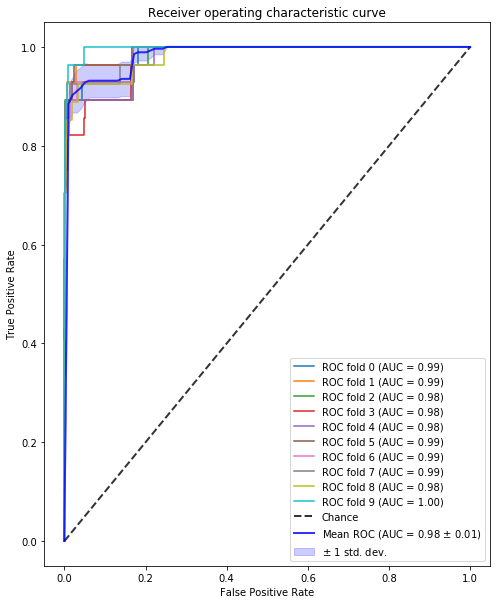

Confusion matrix, without normalization
[[200919    254]
 [    75    202]]


<Figure size 432x288 with 0 Axes>

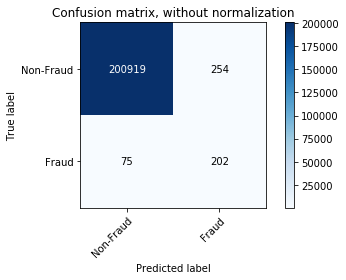

In [13]:
from sklearn.naive_bayes import GaussianNB
from  sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# choose the classifiers for the final model
clf1 = LR(C = 1, solver = 'lbfgs', multi_class = 'auto')
clf2 = LDA(solver='svd')
clf3 = GaussianNB()

clf = VotingClassifier(estimators=[('lr', clf1), ('lda', clf2), ('qda', clf3)], voting='soft', n_jobs = -1)
mean_tpr, std_tpr, mean_auc, std_auc, mean_F1, std_F1, cm = roc_analysis(X_scaled, y, clf, cv, True, True, True, False)

In [17]:
#print results

print('Auc :',mean_auc)
print(std_auc)
print('F1 score',mean_F1)
print(std_F1)

Auc : 0.9824835658168992
0.009527643954230669
F1 score 0.545053568622529
0.05715175224030952


### Voting Classifier on SMOTED data
- First determine the best over-sampling ratio and the number of nearest neighbours used for the extraction of the random samples, which leads to best performance in terms of F1-scoreevaluation is conducted in terms of 10-fold Stratified cross-validation

- We perform the classification on the scaled dataset 


In [31]:
# Use cross-validation to determine the best overasmpling ratio
ratios = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1])
num_neighbours = np.array([5, 10, 100])

m_auc_cv = np.zeros((len(ratios), len(num_neighbours)))
std_auc_cv = np.zeros_like(m_auc_cv)
m_F1_cv = np.zeros_like(m_auc_cv)
std_F1_cv = np.zeros_like(m_auc_cv)

i = 0
for r in ratios: 
    j = 0
    for n in num_neighbours:
        sm = SMOTE(sampling_strategy=r, k_neighbors=n)
        _, _, m_auc_cv[i,j], std_auc_cv[i,j], m_F1_cv[i,j], std_F1_cv[i,j],_ = roc_analysis(X_scaled, y, clf, cv, 
                                                                                False, False, False, False, sm)
        j = j+1
    i = i+1

# Output the mean metrics extracted; rows correspond to over-sampling ratio and columns to number of neighbours
print("Mean AUC:\n", m_auc_cv)
# print("std AUC:\n", std_auc_cv)
print("Mean F1:\n", m_F1_cv)
# print("std F1:\n", std_F1_cv)

Mean AUC:
 [[0.9843902  0.98327054 0.98158703]
 [0.98650794 0.98679119 0.9826105 ]
 [0.9868767  0.98712121 0.98483913]
 [0.98732831 0.98735236 0.98603762]
 [0.98856021 0.98906793 0.98683261]
 [0.98982818 0.9892483  0.98745791]
 [0.98883544 0.98890759 0.98659478]]
Mean F1:
 [[0.42661082 0.43709991 0.35714419]
 [0.15591908 0.15749114 0.09859516]
 [0.08343737 0.083682   0.06688801]
 [0.05648462 0.05599809 0.05407127]
 [0.03734823 0.03711203 0.03803329]
 [0.02659518 0.02587318 0.02699903]
 [0.02282831 0.02241355 0.02328746]]


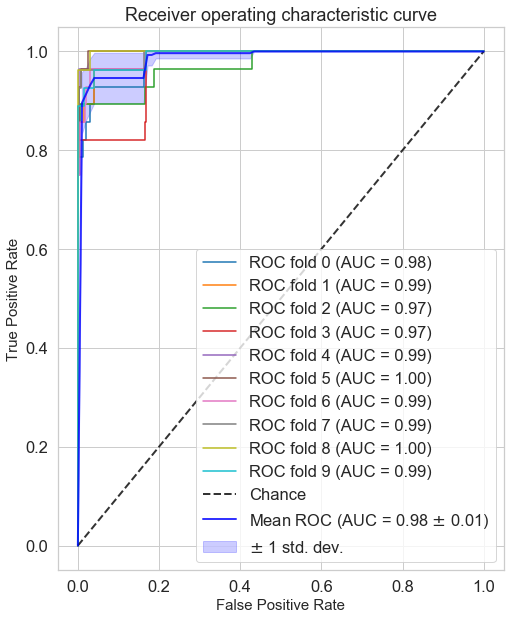

Confusion matrix, without normalization
[[200573    600]
 [    38    239]]


<Figure size 432x288 with 0 Axes>

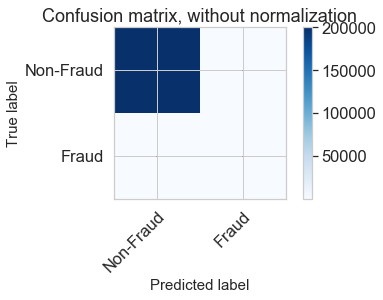

In [24]:

#
sm = SMOTE(sampling_strategy=0.01, k_neighbors=10)
clf = VotingClassifier(estimators=[('lr', clf1), ('lda', clf2), ('qda', clf3)], voting='soft', n_jobs = -1)
mean_tpr_sm, std_tpr_sm, mean_auc_sm, std_auc_sm, mean_F1_sm, std_F1_sm, cm_sm  = roc_analysis(X_scaled, y, clf, cv, True, True, True, False,sm)



In [ ]:
print('AUC:'mean_auc_sm)
print(std_auc_sm)
print('F1:'mean_F1_sm)
print(std_F1_sm)